<h1>Algoritmos voraces</h1>
<p> 
        Un algoritmo es voraz si construye la solución en una sucesión de pasos. En cada uno de estos, tomando 
        una opción localmente óptima con la esperanza de que esto lleve a la solución global óptima. Por esto, 
        el diseño de un algoritmo voraz conlleva dos pasos importantes: la propuesta de una regla voraz y la demostración 
        formal de que tal regla, de hecho, lleva a la solución óptima global. 
</p> 

<h1>Calendarización de intervalos</h1>
<p> Comenzaremos la discusión de los algoritmos voraces con el problema de calendarización de intervalos. 
El problema es el siguiente: Tenemos un conjunto de peticiones, cada una se corresponde con un intervalo $i_i$ 
que comienza en $s_{i}$ y finaliza en $f_{i}$. Decimos que un conjunto de estas peticiones es compatible si 
    ningún  par de estas se traslapan en el tiempo. El objetivo es obtener el conjunto compatible más grande. A tal conjunto se le llamará optimo. 
</p> 
<p> Para ilustrar lo anterior, considera la siguiente imagen: el cuadro de la izquierda no es un conjunto compatible mientras que la de la derecha es un conjunto compatible. 
    </p> 
<img src="fig1.png"> 


<h2> Diseño del algoritmo</h2> 
<p> 
   La idea básica de el algoritmo de calendarización de intervalos es usar la regla para escoger el intervalo $i_1$. 
    Una vez que es aceptado, eliminamos los intervalos que no son compatibles con $i_1$. Ahora seleccionamos el intervalo
    $i_2$ de los intervalos restantes y eliminamos los que no son compatibles. Seguimos de esta manera hasta que ya no 
    haya más intervalos. Ahora, lo interesante es escoger una regla voraz que funcione. Hay varias reglas que podemos 
    considerar, veámos algunas: 
</p> 
<ul> 
<li> 
    La regla más obvia es elegir el intervalo que empieza primero. Es decir uno de los intervalos cuyo $s(i)$ sead 
    minimo. De esta manera nuestro recurso comineza a utilizarse lo más pronto posible. Este método no sirve ya que 
    nuestro primer intervalo puede tomar mucho tiempo, lo cual podría llevar a rechazar muchos intervalos con 
    intervalos de tiempo más cortos. 
    <img src = "fig2-1.png"> 
    </li> 
<li> 
    Podríamos comenzar con el intervalo que requiere menos tiempo. Es decir elegir el intervalo tal que $f(i) - s(i)$
    sea mínimo. Sin embargo esto no lleva a una solución óptima. Véase el contraejemplo en la imagen más abajo. 
    <img src = "fig2-2.png"> 
    </li> 
<li> 
   Otra regla es aceptar el intervalo que tenga el menor númeor de intervalos no compatibles. 
    <img src = "fig2-3.png"> 
    </li> 
</ul> 
<p> 
    La siguiente imagen ilustra cada uno de los contraejemplo para las reglas anteriores: 
</p> 

<p> La regla voraz que lleva a la solución óptima es la siguiente: 
    El algoritmo es el siguiente 
</p> 



Output()

<IPython.core.display.Javascript object>


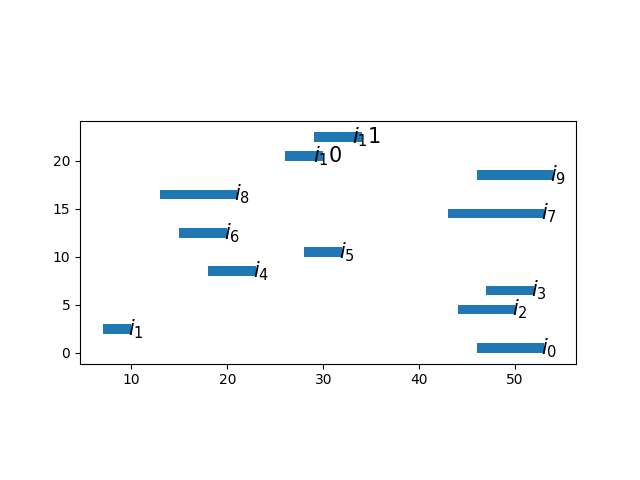

In [1]:
%run calendarizacion_alg.ipynb

A es un conjunto de peticiones compatibles 

Sea O un conjunto optimo 
Sea A el conjunto que regresa el algoritmo
Los índices i son del conjunto A, los índices j son del conjunto O. k es del conjunto A y m es del conjunto O. 
Para todos los índices r <= k tenemos que f(ir) <= f(jr)
Esto se prueba con inducción
Sea r > 1 supongamos que es verdadero para r -1 tenemos que f(i_r - 1) <= f(j_r - 1)
Tenemso que O son compatibles entonces f(j r - 1) <= s(j_r) y entonces tenemos que f(i_r -1) <= s(j_r). 
Entonces j_r esta en conjunto de disponibles. Escoge al que tiene el menor tiempo de finalización y por lo tanto f(i_r) <= f(j_r) el que el algoritmo escoge es menor ya que j_r esta entre los que se pueden escoger 

El algoritmo regresa un conjunto optimo A